In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_jan = pd.read_csv(r'223PSC_Jan.csv', encoding='unicode_escape')
df_nov = pd.read_csv(r'223PSC_Nov.csv', encoding='unicode_escape')

In [3]:
df_jan.head()

,Cust,Customer Name,Group,Part Number,Description,Doc,Line,Date,Time,Qty,Unit,Disc%,Tot Goods
0,193750,ROCK AUTO LLC,ACD,ACD1,SPARK PLUG ASM-19307139,02V2077341,2,Jan 04 23,15:39,6,3.66,NaN,21.96
1,193750,ROCK AUTO LLC,ACD,ACD10477565,SEALO/PMP DRV(O RING)-104,02V2085767,6,Jan 12 23,16:46,1,2.34,NaN,2.34
2,193750,ROCK AUTO LLC,ACD,ACD10477565,SEALO/PMP DRV(O RING)-104,02V2089092,1,Jan 15 23,20:48,1,2.34,NaN,2.34
3,193750,ROCK AUTO LLC,ACD,ACD11M23,MOTOR KITFRT S/D WDO REG-,02V2096812,3,Jan 22 23,20:38,1,26.05,NaN,26.05
4,193750,ROCK AUTO LLC,ACD,ACD12337894,GASKETOIL FLTR ADAP-12337,02V2085767,3,Jan 12 23,16:46,1,0.08,NaN,0.08


In [4]:
df_nov.head()

,Cust,Customer Name,Group,Part Number,Description,Doc,Line,Date,Time,Qty,Unit,Disc%,Tot Goods
0,193750,ROCK AUTO LLC,ACD,ACD10070107,VALVEHTR AIR BL-10070107,02V2013956,2,Nov 16 22,16:42,1,8.09,NaN,8.09
1,193750,ROCK AUTO LLC,ACD,ACD11M23,MOTOR KITFRT S/D WDO REG-,02V2013309,3,Nov 16 22,16:35,1,26.05,NaN,26.05
2,193750,ROCK AUTO LLC,ACD,ACD12337894,GASKETOIL FLTR ADAP-12337,02V2022158,1,Nov 21 22,16:08,1,0.08,NaN,0.08
3,193750,ROCK AUTO LLC,ACD,ACD12494846,INDICATORWSWA SOLV LVL-12,02V1987660,1,Nov 02 22,16:04,1,17.55,NaN,17.55
4,193750,ROCK AUTO LLC,ACD,ACD12494846,INDICATORWSWA SOLV LVL-12,02V2016761,2,Nov 18 22,15:40,1,17.55,NaN,17.55


In [5]:
df_jan.drop(columns=['Cust', 'Customer Name', 'Description', 'Doc', 'Disc%'], inplace=True)

In [6]:
df_nov.drop(columns=['Cust', 'Customer Name', 'Description', 'Doc', 'Disc%'], inplace=True)

In [7]:
df_jan.head()

,Group,Part Number,Line,Date,Time,Qty,Unit,Tot Goods
0,ACD,ACD1,2,Jan 04 23,15:39,6,3.66,21.96
1,ACD,ACD10477565,6,Jan 12 23,16:46,1,2.34,2.34
2,ACD,ACD10477565,1,Jan 15 23,20:48,1,2.34,2.34
3,ACD,ACD11M23,3,Jan 22 23,20:38,1,26.05,26.05
4,ACD,ACD12337894,3,Jan 12 23,16:46,1,0.08,0.08


In [8]:
df_nov.head()

,Group,Part Number,Line,Date,Time,Qty,Unit,Tot Goods
0,ACD,ACD10070107,2,Nov 16 22,16:42,1,8.09,8.09
1,ACD,ACD11M23,3,Nov 16 22,16:35,1,26.05,26.05
2,ACD,ACD12337894,1,Nov 21 22,16:08,1,0.08,0.08
3,ACD,ACD12494846,1,Nov 02 22,16:04,1,17.55,17.55
4,ACD,ACD12494846,2,Nov 18 22,15:40,1,17.55,17.55


In [9]:
print(df_jan.duplicated().sum())
print(df_nov.duplicated().sum())

185
263


In [10]:
df_jan.drop_duplicates(inplace=True)
df_nov.drop_duplicates(inplace=True)

In [11]:
print(df_jan.isna().sum())
print(df_nov.isna().sum())

Group          0
Part Number    0
Line           0
Date           0
Time           0
Qty            0
Unit           0
Tot Goods      0
dtype: int64
Group          1
Part Number    0
Line           0
Date           0
Time           0
Qty            0
Unit           0
Tot Goods      0
dtype: int64


In [12]:
df_nov.dropna(inplace=True)

In [13]:
print(df_jan.isna().sum())
print(df_jan.duplicated().sum())
print(df_nov.isna().sum())
print(df_nov.duplicated().sum())

Group          0
Part Number    0
Line           0
Date           0
Time           0
Qty            0
Unit           0
Tot Goods      0
dtype: int64
0
Group          0
Part Number    0
Line           0
Date           0
Time           0
Qty            0
Unit           0
Tot Goods      0
dtype: int64
0


In [14]:
df_jan.rename(columns={'Part Number':'Part', 'Tot Goods':'Total'}, inplace=True)
df_nov.rename(columns={'Part Number':'Part', 'Tot Goods':'Total'}, inplace=True)

In [15]:
plot_df_jan = df_jan.set_index(['Group', 'Part'])
plot_df_nov = df_nov.set_index(['Group', 'Part'])

In [16]:
skp_jan = plot_df_jan.loc['SKP']
skp_jan.sort_values(by='Date', inplace=True)

C:\Users\zachd\AppData\Local\Temp\ipykernel_144280\94911879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skp_jan.sort_values(by='Date', inplace=True)


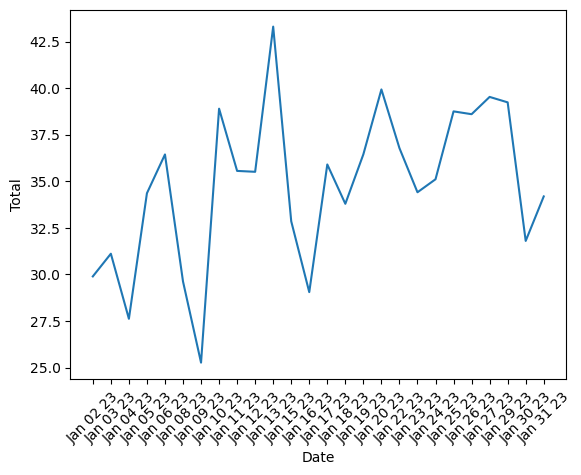

In [17]:
sns.lineplot(data=skp_jan, x='Date', y='Total',errorbar=None)
plt.xticks(rotation=45);